In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers


In [3]:

# Define the directory path where the images are located
directory = r"C:\Users\koti0\myntra\dataset"

In [69]:
# load the dataest


# Split ratio for validation data
validation_split = 0.2

# Load the image dataset from the directory
test_data,train_data = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=64,
    image_size=(60, 80),
    validation_split=validation_split,  # Specify the validation split
    subset="both",  # Set subset to both  data to returning test and train data
    seed=2
)


Found 25469 files belonging to 10 classes.
Using 20376 files for training.
Using 5093 files for validation.


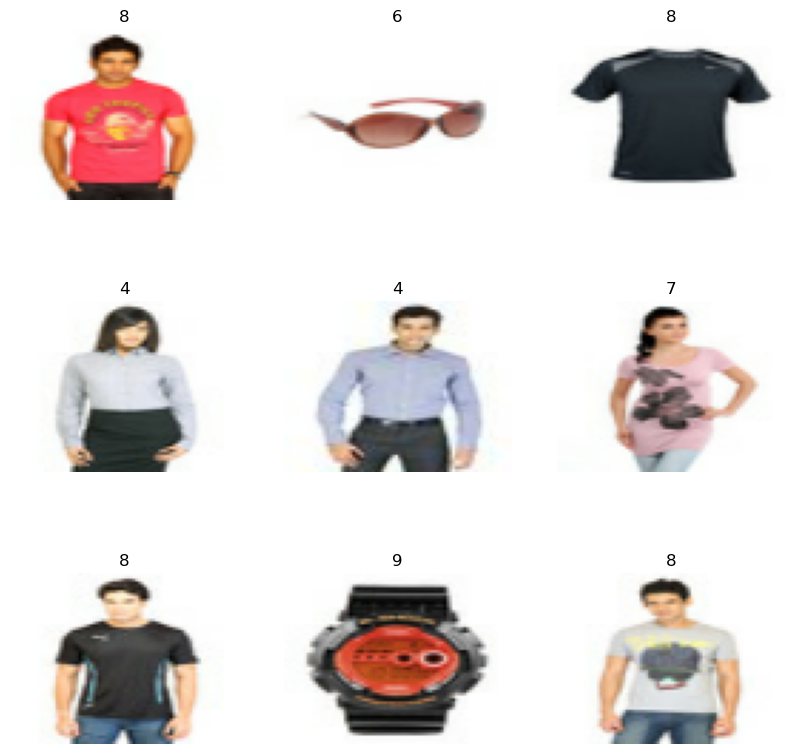

In [70]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(64):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

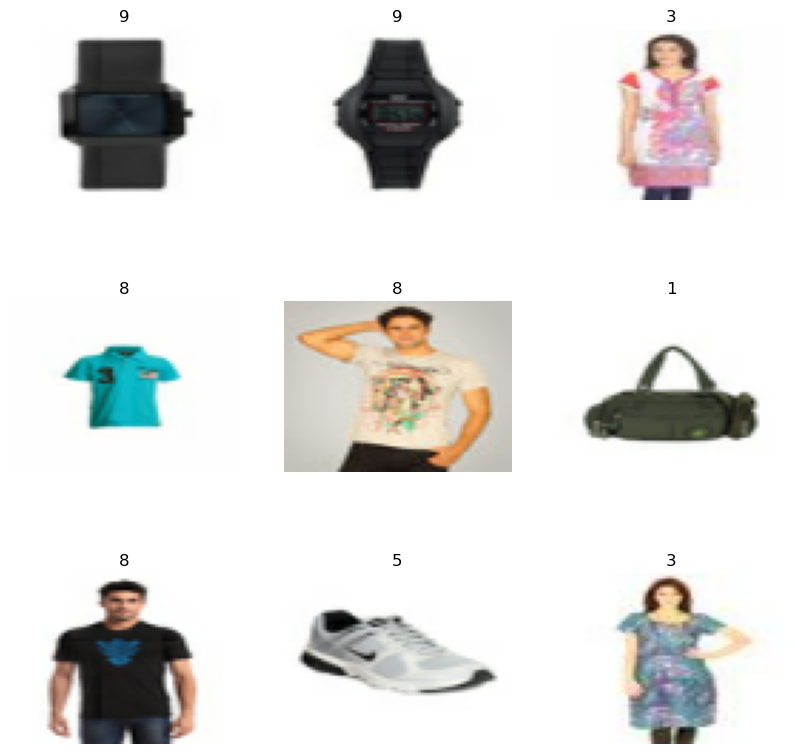

In [71]:
plt.figure(figsize=(10, 10))
for images, labels in test_data.take(65):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [72]:

# Normalize the data
def img_process(image, label):
    image = tf.cast(image / 255, tf.float32)
    return image, label

train_data = train_data.map(img_process)
test_data = test_data.map(img_process)

In [73]:

# Create the CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(60, 80, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 60, 80, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 60, 80, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 30, 40, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 40, 64)        18496     
                                                                 
 batch_normalization_7 (Batc  (None, 30, 40, 64)       256       
 hNormalization)                                                 
                                                      

In [75]:
# Define the directory path to save the best model
save_dir = r"C:\Users\koti0\myntra"  # Replace with the desired save directory

# Define the checkpoint callback to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath=save_dir + "/best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Define the early stopping callback
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1
)



In [76]:
history=model.fit(
    train_data,
    validation_data=test_data,
    epochs=10,
    callbacks=[checkpoint_callback, early_stopping_callback]
)


Epoch 1/10
80/80 [==============================] - ETA: 0s - loss: 1.0851 - accuracy: 0.6513
Epoch 1: val_loss improved from inf to 2.20232, saving model to C:\Users\koti0\myntra\best_model.h5
80/80 [==============================] - 44s 533ms/step - loss: 1.0851 - accuracy: 0.6513 - val_loss: 2.2023 - val_accuracy: 0.2924
Epoch 2/10
80/80 [==============================] - ETA: 0s - loss: 0.5331 - accuracy: 0.7946
Epoch 2: val_loss improved from 2.20232 to 1.55976, saving model to C:\Users\koti0\myntra\best_model.h5
80/80 [==============================] - 46s 576ms/step - loss: 0.5331 - accuracy: 0.7946 - val_loss: 1.5598 - val_accuracy: 0.3964
Epoch 3/10
80/80 [==============================] - ETA: 0s - loss: 0.4015 - accuracy: 0.8441
Epoch 3: val_loss improved from 1.55976 to 1.27818, saving model to C:\Users\koti0\myntra\best_model.h5
80/80 [==============================] - 40s 504ms/step - loss: 0.4015 - accuracy: 0.8441 - val_loss: 1.2782 - val_accuracy: 0.4968
Epoch 4/10
80/

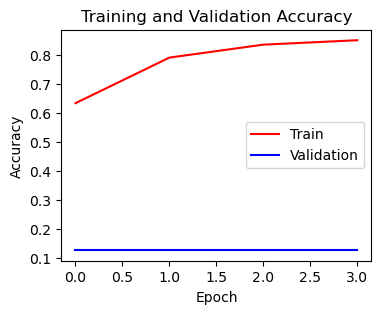

In [59]:
import matplotlib.pyplot as plt

plt.figure(1, (4,3))
plt.plot(history.history['accuracy'], color='red', label='Train')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


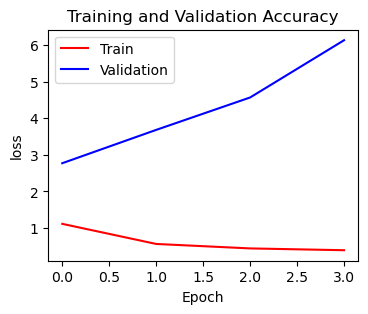

In [60]:
import matplotlib.pyplot as plt

plt.figure(2, (4,3))
plt.plot(history.history['loss'], color='red', label='Train')
plt.plot(history.history['val_loss'], color='blue', label='Validation')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [88]:

# Create empty lists to store the actual labels
actual_labels = []
predicted_labels = []
# Iterate over the test data and extract the labels
for images, labels in test_data:   
    actual_labels.extend(labels.numpy())
    predictions = model.predict(images)  # Get model predictions for the batch
    predicted_labels.extend(np.argmax(predictions, axis=1)) 
    
# Convert the labels list to a NumPy array
actual_labels = np.array(actual_labels)
predicted_labels = np.array(predicted_labels)

2/2 [==============================] - 0s 43ms/step


2/2 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 57ms/step


array([8, 9, 4, ..., 5, 0, 4])

In [90]:

# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(test_data)
(loss, accuracy)

319/319 [==============================] - 21s 67ms/step - loss: 0.7530 - accuracy: 0.7430


(0.7530415654182434, 0.7430310249328613)

In [93]:

accuracy=tf.keras.metrics.Accuracy()(actual_labels, predicted_labels)
# Calculate other evaluation metrics
#calculate precision, recall, and F1 score
# Replace 'labels' and 'predictions' with the actual label and prediction values
precision = tf.keras.metrics.Precision()(actual_labels, predicted_labels)
recall = tf.keras.metrics.Recall()(actual_labels, predicted_labels)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the calculated metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
# Replace 'labels' and 'predictions' with the actual label and prediction values
confusion_matrix = tf.math.confusion_matrix(actual_labels, predicted_labels)
print("Confusion Matrix:")
print(confusion_matrix)


Precision: tf.Tensor(0.9708419, shape=(), dtype=float32)
Recall: tf.Tensor(0.96643215, shape=(), dtype=float32)
F1 Score: tf.Tensor(0.96863204, shape=(), dtype=float32)
Accuracy: tf.Tensor(0.743031, shape=(), dtype=float32)
Confusion Matrix:
tf.Tensor(
[[1799    3  265    0    0  193    0    6   56    1]
 [   4 1364    5    0    1    5    0   15   48    4]
 [  35    1 1001    0    0    8    0    2    3    0]
 [   2    2    0 1003   56    0    0   95  241   69]
 [   2    1    0    2 1395    0    0    9 1146    1]
 [ 503    4   95    0    2  959    0   11   53    0]
 [  33  481   52    0    0    1   24    3  276    5]
 [  14   12    3   12   41    1    0  147 1135   23]
 [  10   19    8    0    7    1    1   59 5472   11]
 [   3   43    2    0    9    4    0    5   13 1976]], shape=(10, 10), dtype=int32)


In [ ]:
# predict the 

# Load the image using OpenCV
image_path = "path/to/image.jpg"  # Replace with the actual image path
image = cv2.imread(image_path)

# Preprocess the image for prediction
image = cv2.resize(image, (256, 256))  # Resize the image to the desired size
image = image / 255.0  # Normalize the pixel values to the range [0, 1]
image = tf.expand_dims(image, axis=0)  # Add an extra dimension for batch

# Perform prediction using your model
predictions = model.predict(image)

# Get the predicted class
predicted_class = tf.argmax(predictions[0]).numpy()

# Print the predicted class
print("Predicted class:", predicted_class)
